# 05 Feature space

## TODO

- Sæt labels på x og y aksen
- QOL lav nearst neighbor lidt pænere

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fasttext

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [2]:
data = pd.read_csv('./data/sklearn.csv')

model = fasttext.load_model('./data/fasttext_trained_model.bin')
data['vec'] = data['review'].apply(lambda x: model.get_sentence_vector(x))

In [125]:
# modellen kan her finde de ord der er tættes på parametret 
# print(model.get_nearest_neighbors('dårlig'),"\n")
dårlig = model.get_nearest_neighbors('dårlig')
utilfreds = model.get_nearest_neighbors('utilfreds')
glad = model.get_nearest_neighbors('glad')
a = []
b = []
c = []
test = []
for k, v in dårlig:
#     print(v)
    a.append(v)
    
for k, v in utilfreds:
#     print(v)
    b.append(v)
    
for k, v in glad:
#     print(v)
    c.append(v)

# print("\u0332".join("dårlig"),'    ', "\u0332".join("utilfreds") ,'     ', "\u0332".join("Glad"))
# res = "\n".join("{} {}".format(x, y, z) for x, y, z in zip(a, b, c)) 
# print(res) 
test.append(a)
test.append(b)
test.append(c)

length_list = [len(element) for row in test for element in row]

# print(test)

colum_width = max(length_list)

for row in test:
    row = "".join(element.ljust(colum_width + 8) for element in row)
    print(row)

annulleret        gøre              vide              kontakt           gavekort          kunder            annullere         væk               total             modtager          
,dårlig           ringe             betalt            forkerte          brugte            se                umuligt           pludselig         kurv              færdig            
sendte            synes             grund             før               ,jeg              bruge.            varen.            heller            for.              har.              


In [4]:
kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data['vec'].values.tolist())

4    1478
1     791
3     761
2     448
0     162
Name: cluster, dtype: int64


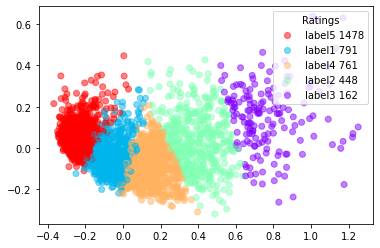

In [5]:
pca = PCA(n_components=3)
data['x'] = pca.fit_transform(data['vec'].values.tolist())[:,0]
data['y'] = pca.fit_transform(data['vec'].values.tolist())[:,1]
data['z'] = pca.fit_transform(data['vec'].values.tolist())[:,2]

scatter = plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow', alpha=0.5)

# dc = data_cluster
# cc = cluster_colors
# cl = cluster_labels
print(data['cluster'].value_counts())
dc = data['cluster'].value_counts()
dc = -np.sort(-dc)
cc = data['cluster'].value_counts().index.tolist()

cl = []
for i in model.labels:
    cl.append(i.replace('__',''))

handles = scatter.legend_elements(num=cc)[0]  # extract the handles from the existing scatter plot

plt.legend(title='Ratings', handles=handles,  
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])

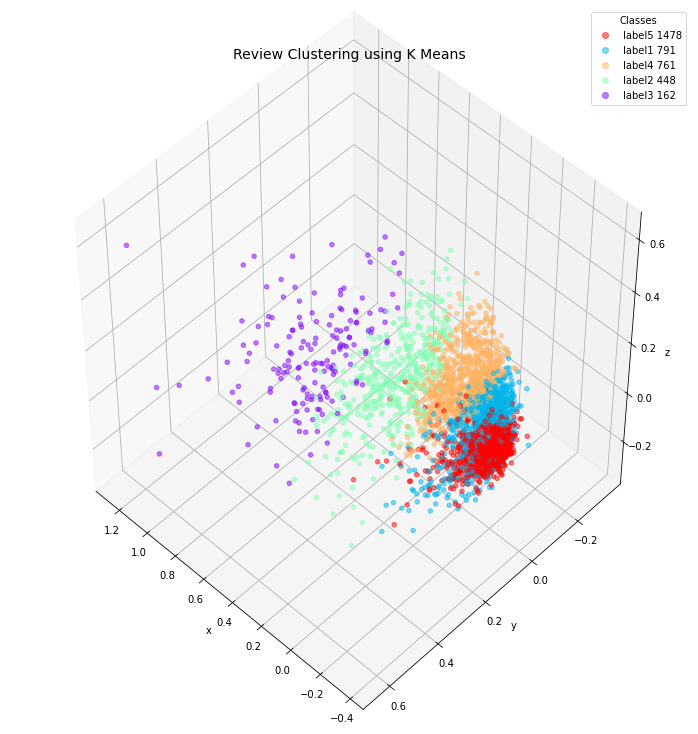

In [6]:
fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data['x'],data['y'],data['z'], c=data['cluster'], cmap='rainbow', alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Review Clustering using K Means", fontsize=14)
plt.legend(title='Classes', handles=handles, 
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])